
# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: [Kaggle Competition Link](https://www.kaggle.com/c/bluebook-for-bulldozers/data)

There are 3 main datasets:

- **Train.csv** is the training set, which contains data through the end of 2011.
- **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012. You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
#importing training and validation data
df=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
len(df)

412698

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

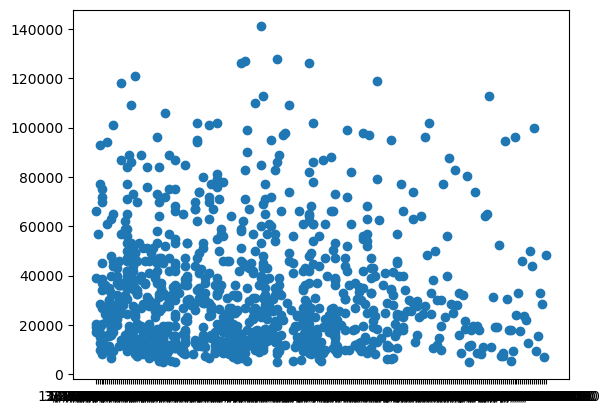

In [6]:
fig, ax =plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])
plt.show()

<Axes: ylabel='Frequency'>

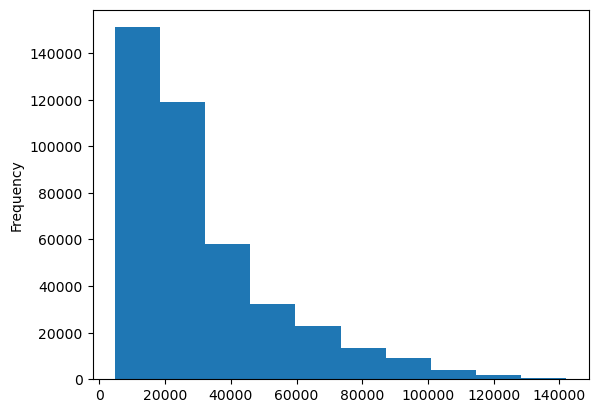

In [7]:
df.SalePrice.plot.hist()

In [8]:
df=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

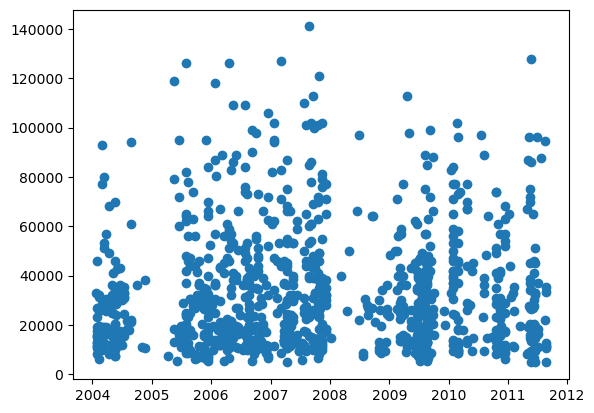

In [9]:
fig, ax =plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])


In [10]:
### Sort Dataframe by saledate
df=df.sort_values(by=["saledate"],ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [11]:
#Copy of original dataset
df_temp=df.copy()

In [12]:
# datetime parameter for saledate column
df_temp["saleYear"]=df_temp.saledate.dt.year
df_temp["saleMonth"]=df_temp.saledate.dt.month
df_temp["saleDay"]=df_temp.saledate.dt.day
df_temp["saleDayOfWeek"]=df_temp.saledate.dt.day_of_week
df_temp["saleDayOfYear"]=df_temp.saledate.dt.day_of_year

In [13]:
df_temp=df_temp.drop("saledate",axis=1)

In [14]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


### Modelling

In [16]:
##Convert strings to Categories
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [17]:
# Turn all string values in categories
for label,content in df_temp.items():
     if pd.api.types.is_string_dtype(content):
         df_temp[label]=content.astype("category").cat.as_ordered()

In [18]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [19]:
df_temp.to_csv("bluebook-for-bulldozers/tain_tmp.csv",index=False)

In [20]:
df_temp=pd.read_csv("bluebook-for-bulldozers/tain_tmp.csv",low_memory=False)
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Fill Missing values

In [21]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [22]:
#Fill numeric rows with median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+"_is_missing"]=pd.isnull(content)
            df_temp[label]=content.fillna(content.median())

In [23]:
len(df_temp)

412698

In [24]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [25]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

## Filling and turning categorial variable into numbers

In [26]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [28]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], shape=(412698,), dtype=int8)

In [29]:
## Tuen Categorial variables into numbers and fill mising
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+"_is_missing_"]=pd.isnull(content)
        df_temp[label]=pd.Categorical(content).codes+1

In [30]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)## No missing values then

In [31]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing_
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [32]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing_,False,True,False,True,False
Blade_Type_is_missing_,False,True,False,True,False
Travel_Controls_is_missing_,False,True,False,True,False
Differential_Type_is_missing_,True,False,True,False,True


In [33]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
                                ..
Backhoe_Mounting_is_missing_     0
Blade_Type_is_missing_           0
Travel_Controls_is_missing_      0
Differential_Type_is_missing_    0
Steering_Controls_is_missing_    0
Length: 103, dtype: int64

## Lets start Modelline

In [34]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Instantiate the Model
model =RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

CPU times: total: 42min 4s
Wall time: 3min 59s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [36]:
#Score the Model
model.score(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

0.9875468079970562

## Spiltting of Data

In [37]:
df_temp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [38]:
# Split Data into Training and Validation
df_val=df_temp[df_temp.saleYear == 2012]
df_train=df_temp[df_temp.saleYear!=2012]
len(df_val),len(df_train)

(11573, 401125)

## Split data into X and y

In [40]:
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building our own evaluation Function

In [46]:
# The competition needs RMSLE
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

#Create function to evaluate model on a few differnt levels
def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    scores={"Training MAE": mean_absolute_error(y_train,train_preds),
           "Vailed MAE":mean_absolute_error(y_valid,val_preds),
            "Training RMSLE": rmsle(y_train,train_preds),
            "Vaild RMSLE":rmsle(y_valid,val_preds),
            "Taining R^2":r2_score(y_train,train_preds),
            "Vaild R^2": r2_score(y_valid,val_preds)}
    return scores

## Testing our model on subset (tunning Hyperparameters)

In [43]:
# %%time
# model=RandomForestRegressor(n_jobs=-1,random_state=42)
# model.fit(X_train,y_train)

In [44]:
# Change max_samples value
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)

In [45]:
%%time
model.fit(X_train,y_train)

CPU times: total: 1min 11s
Wall time: 7.46 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [47]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Vailed MAE': 7177.26365505919,
 'Training RMSLE': np.float64(0.257745378256977),
 'Vaild RMSLE': np.float64(0.29362638671089003),
 'Taining R^2': 0.8606658995199189,
 'Vaild R^2': 0.8320374995090507}

## Hyperparameter tunning with RandomizedSearchCV

In [48]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[10000]}

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=5,cv=5,verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


E:\ayushi\project\Bulldozer_Rate\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "E:\ayushi\project\Bulldozer_Rate\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\ayushi\project\Bulldozer_Rate\env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "E:\ayushi\project\Bulldozer_Rate\env\Lib\site-packages\skle

CPU times: total: 1min 38s
Wall time: 20.6 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [49]:
rs_model.best_params_

{'n_estimators': np.int64(40),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(1),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [50]:
#Evalute the RandomizedSearchModel
show_scores(rs_model)

{'Training MAE': 6978.78109372159,
 'Vailed MAE': 8058.078385026458,
 'Training RMSLE': np.float64(0.31050866548044403),
 'Vaild RMSLE': np.float64(0.32776959992737764),
 'Taining R^2': 0.7941803542262716,
 'Vaild R^2': 0.7981134277902844}

In [53]:
%%time
## Train Model after 100 iterations
ideal_model=RandomForestRegressor(n_estimators=40,min_samples_leaf=1,min_samples_split=14,max_features=0.5,n_jobs=-1,max_samples=None,random_state=43)
ideal_model.fit(X_train,y_train)

CPU times: total: 8min 10s
Wall time: 47.6 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=43)

In [54]:
show_scores(ideal_model)

{'Training MAE': 2955.8177759660744,
 'Vailed MAE': 5962.289466974811,
 'Training RMSLE': np.float64(0.14456204784649837),
 'Vaild RMSLE': np.float64(0.24584427146072488),
 'Taining R^2': 0.9587437201288861,
 'Vaild R^2': 0.8812318992631967}

In [55]:
show_scores(rs_model)

{'Training MAE': 6978.781093721588,
 'Vailed MAE': 8058.078385026458,
 'Training RMSLE': np.float64(0.31050866548044403),
 'Vaild RMSLE': np.float64(0.32776959992737764),
 'Taining R^2': 0.7941803542262716,
 'Vaild R^2': 0.7981134277902844}

## Make predisctions on Test data

In [73]:
df_test=pd.read_csv("./bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## Preprocessing date as training dataset

In [75]:
def preprocessing_data(df):
    # datetime parameter for saledate column
    df["saleYear"]=df.saledate.dt.year
    df["saleMonth"]=df.saledate.dt.month
    df["saleDay"]=df.saledate.dt.day
    df["saleDayOfWeek"]=df.saledate.dt.day_of_week
    df["saleDayOfYear"]=df.saledate.dt.day_of_year
    df=df.drop("saledate",axis=1)
    #Fill numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"]=pd.isnull(content)
                df[label]=content.fillna(content.median())
        #Fill categorical missing data entered categories into numbers
    
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing_"]=pd.isnull(content)
            df[label]=pd.Categorical(content).codes+1
    return df

In [76]:
#Process the test data
df_test=preprocessing_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing_,Stick_Length_is_missing_,Thumb_is_missing_,Pattern_Changer_is_missing_,Grouser_Type_is_missing_,Backhoe_Mounting_is_missing_,Blade_Type_is_missing_,Travel_Controls_is_missing_,Differential_Type_is_missing_,Steering_Controls_is_missing_
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [77]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing_,Stick_Length_is_missing_,Thumb_is_missing_,Pattern_Changer_is_missing_,Grouser_Type_is_missing_,Backhoe_Mounting_is_missing_,Blade_Type_is_missing_,Travel_Controls_is_missing_,Differential_Type_is_missing_,Steering_Controls_is_missing_
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [78]:
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [79]:
#Mannally adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"]=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing_,Thumb_is_missing_,Pattern_Changer_is_missing_,Grouser_Type_is_missing_,Backhoe_Mounting_is_missing_,Blade_Type_is_missing_,Travel_Controls_is_missing_,Differential_Type_is_missing_,Steering_Controls_is_missing_,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [81]:
print(X_train.columns)
print(df_test.columns)


Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing_', 'Stick_Length_is_missing_',
       'Thumb_is_missing_', 'Pattern_Changer_is_missing_',
       'Grouser_Type_is_missing_', 'Backhoe_Mounting_is_missing_',
       'Blade_Type_is_missing_', 'Travel_Controls_is_missing_',
       'Differential_Type_is_missing_', 'Steering_Controls_is_missing_'],
      dtype='object', length=102)
Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Stick_Length_is_missing_', 'Thumb_is_missing_',
       'Pattern_Changer_is_missing_', 'Grouser_Type_is_missing_',
       'Backhoe_Mounting_is_missing_', 'Blade_Type_is_missing_',
       'Travel_Controls_is_missing_', 'Differential_Type_is_missing_',
       'St

In [82]:
if 'auctioneerID_is_missing_' in df_test.columns:
    df_test = df_test.drop(columns=['auctioneerID_is_missing_'])

In [84]:
set(X_train.columns)-set(df_test.columns)

set()

In [85]:
# Check if columns match
print("Training columns:", X_train.columns)
print("Test columns:", df_test.columns)

# Check if column names are the same
print("Do columns match?", set(X_train.columns) == set(df_test.columns))

Training columns: Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing_', 'Stick_Length_is_missing_',
       'Thumb_is_missing_', 'Pattern_Changer_is_missing_',
       'Grouser_Type_is_missing_', 'Backhoe_Mounting_is_missing_',
       'Blade_Type_is_missing_', 'Travel_Controls_is_missing_',
       'Differential_Type_is_missing_', 'Steering_Controls_is_missing_'],
      dtype='object', length=102)
Test columns: Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Stick_Length_is_missing_', 'Thumb_is_missing_',
       'Pattern_Changer_is_missing_', 'Grouser_Type_is_missing_',
       'Backhoe_Mounting_is_missing_', 'Blade_Type_is_missing_',
       'Travel_Controls_is_missing_', 'Differenti

In [86]:
# Remove the 'auctioneerID_is_missing_' column from df_test if it's not in X_train
df_test = df_test.drop(columns=['auctioneerID_is_missing_'], errors='ignore')

In [87]:
df_test = df_test[X_train.columns]

In [88]:
test_preds = ideal_model.predict(df_test)

In [89]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing_,Stick_Length_is_missing_,Thumb_is_missing_,Pattern_Changer_is_missing_,Grouser_Type_is_missing_,Backhoe_Mounting_is_missing_,Blade_Type_is_missing_,Travel_Controls_is_missing_,Differential_Type_is_missing_,Steering_Controls_is_missing_
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [90]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing_,Stick_Length_is_missing_,Thumb_is_missing_,Pattern_Changer_is_missing_,Grouser_Type_is_missing_,Backhoe_Mounting_is_missing_,Blade_Type_is_missing_,Travel_Controls_is_missing_,Differential_Type_is_missing_,Steering_Controls_is_missing_
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,True


In [92]:
test_preds

array([17358.34819769, 17641.91470557, 50684.37469133, ...,
       13783.93390918, 15920.14401321, 29316.4199868 ], shape=(12457,))

In [93]:
#Format prediction into the same format kaggle asked
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,17358.348198
1,1227844,17641.914706
2,1227847,50684.374691
3,1227848,63459.673580
4,1227863,59692.335604
...,...,...
12452,6643171,41481.558943
12453,6643173,12198.251154
12454,6643184,13783.933909
12455,6643186,15920.144013


## Featured Importance

In [96]:
ideal_model.feature_importances_

array([3.27908949e-02, 2.07167941e-02, 4.18198494e-02, 2.18536842e-03,
       3.31916883e-03, 1.98118559e-01, 3.32583332e-03, 1.09763821e-03,
       4.34532442e-02, 5.43853517e-02, 6.61996128e-02, 4.14617330e-03,
       1.32628820e-02, 1.55079696e-01, 4.22535852e-02, 5.98073133e-03,
       1.92919239e-03, 1.82078749e-03, 2.83945522e-03, 5.80423755e-02,
       5.94980861e-04, 5.80726207e-05, 1.01438603e-03, 1.70372658e-04,
       1.24876955e-03, 9.12707286e-05, 2.01118551e-03, 9.98588728e-03,
       3.14983801e-04, 2.15091651e-03, 5.96792925e-03, 1.68405965e-03,
       3.55796149e-03, 2.24313695e-03, 2.42370541e-04, 1.11454908e-02,
       8.11553506e-04, 7.86670570e-03, 5.31304656e-06, 3.25259421e-03,
       8.60014437e-04, 8.69908073e-04, 1.99723543e-03, 5.88892170e-04,
       4.11870770e-04, 3.32336825e-04, 6.90308401e-04, 2.15720778e-03,
       1.40467549e-03, 1.83633463e-04, 2.15728813e-04, 7.36067191e-02,
       3.80787681e-03, 5.69068481e-03, 2.88278455e-03, 9.83232871e-03,
      

In [103]:
def plot_features(columns,importance,n=20):
    df=(pd.DataFrame({"features":columns,
                     "feature_importances":importance}).sort_values("feature_importances",ascending=False).reset_index(drop=True))

    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("features")
    ax.set_xlabel("feature importance")
    ax.invert_yaxis()
    plt.show()

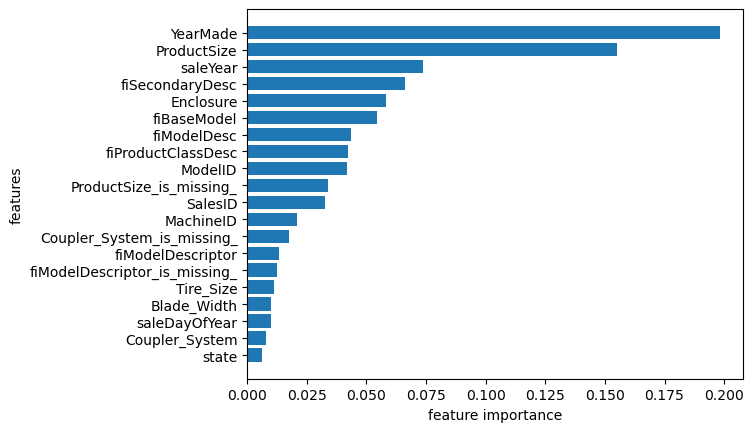

In [104]:
plot_features(X_train.columns,ideal_model.feature_importances_)